<a href="https://colab.research.google.com/github/TahaBerk58/python/blob/main/projects/Data%20Analysis/Mobile_Device_Usage_and_User_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Device Usage and User Behavior Analysis

### Kütüphanelerin Yüklenmesi
- `pandas`, `numpy`, `matplotlib`, `seaborn`: Veri analizi ve görselleştirme için temel kütüphaneler.
- `warnings`: Uyarıları gizlemek için kullanılır.
- `sklearn`: Veri ön işleme, modelleme ve değerlendirme araçları içerir.

### Veri Kümesinin Yüklenmesi ve İncelenmesi
1. **Veri Yükleme**: Kullanıcı davranış verisi `user_behavior_dataset.csv` dosyasından `pd.read_csv` ile yüklenir.
2. **Veri Bilgisi**: `df.info()` ile veri türleri, sütunlar ve eksik veri bilgileri görüntülenir.
3. **Eksik Değerler**: `df.isnull().sum()` ile her sütundaki eksik değer sayıları gösterilir.
4. **İlk Satırların Görüntülenmesi**: `df.head(15)` ile veri setinin ilk 15 satırı incelenir.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df=pd.read_csv("/content/drive/MyDrive/Yazılım/Colab Notebooks/Python/Data Analysis/Mobile Device Usage and User Behavior Analysis/user_behavior_dataset.csv")
print(df.info())
print(df.isnull().sum())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
User ID                       0
Device Model                  0
Operating System      



---


# Univariate Analysis

### Uygulama Kullanım Süresi Dağılım Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(8, 6))` ile grafiğin boyutu 8x6 inç olarak ayarlandı.
- **Histogram ve KDE Çizimi**: `sns.histplot()` fonksiyonu kullanılarak uygulama kullanım süresinin dağılımı 30 aralık ile histogram ve yoğunluk eğrisi (`kde=True`) şeklinde çizildi.
- **Grafik Başlığı ve Etiketler**: Başlık, x ve y ekseni etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

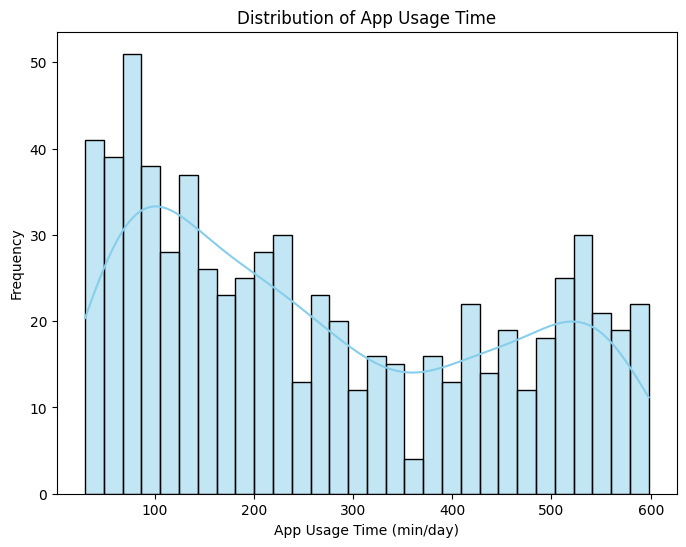

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

### Ekran Açık Kalma Süresi Dağılım Kutusu Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(8, 6))` ile grafik boyutu 8x6 inç olarak ayarlandı.
- **Boxplot Çizimi**: `sns.boxplot()` fonksiyonu, ekran açık kalma süresi dağılımını görselleştirmek için kullanıldı. Renk olarak `lightgreen` seçildi.
- **Grafik Başlığı ve Etiketler**: Başlık ve x ekseni etiketi eklendi. Y ekseni etiketi yalnızca sıklık gösterdiğinden isim verilmedi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

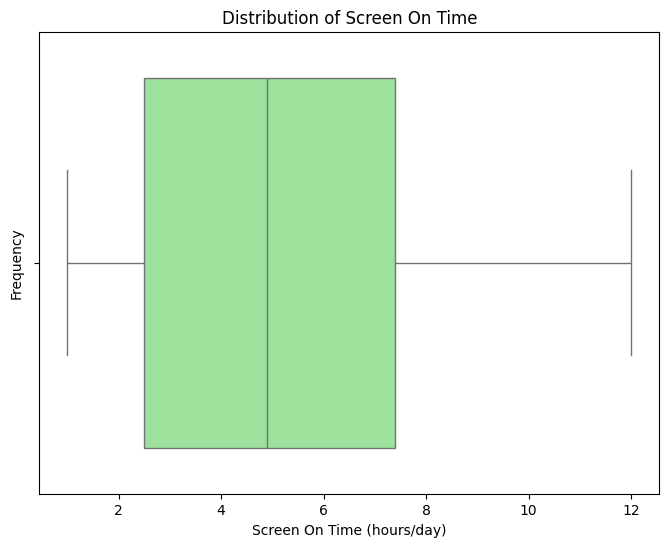

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='lightgreen')
plt.title('Distribution of Screen On Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.show()

### Batarya Tüketimi Dağılımı Yoğunluk Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(8, 6))` ile grafik boyutu 8x6 inç olarak ayarlandı.
- **Yoğunluk Grafiği (KDE)**: `sns.kdeplot()` ile batarya tüketiminin yoğunluk grafiği çizildi, `shade=True` ile grafik alanı renklendirildi ve `salmon` rengi seçildi.
- **Grafik Başlığı ve Etiketler**: Başlık, x ekseni (`Battery Drain (mAh/day)`) ve y ekseni (`Density`) etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

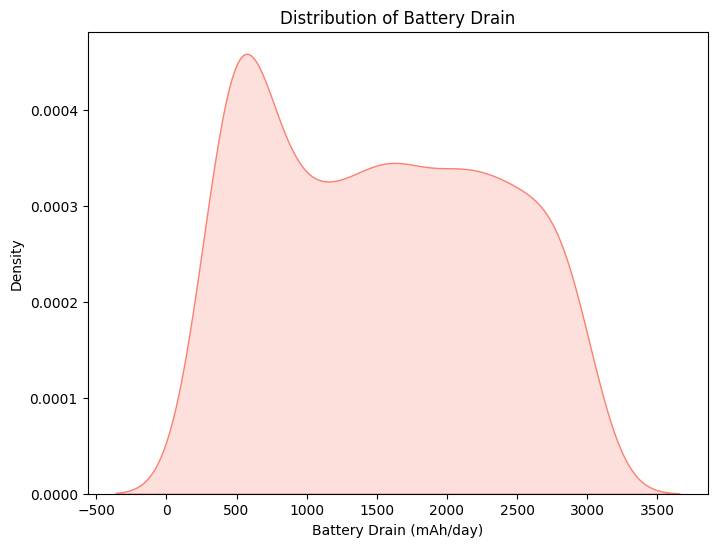

In [5]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='salmon')
plt.title('Distribution of Battery Drain')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()

### Yüklenen Uygulama Sayısının Dağılımı Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(22, 10))` ile grafik boyutu 22x10 inç olarak ayarlandı.
- **Sayı Grafiği (Countplot)**: `sns.countplot()` ile veri kümesindeki "Number of Apps Installed" sütunundaki farklı değerlerin sıklığı görselleştirildi. `palette='viridis'` ile renk paleti belirlendi.
- **Grafik Başlığı ve Etiketler**: Başlık, x ekseni (`Number of Apps Installed`) ve y ekseni (`Frequency`) etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

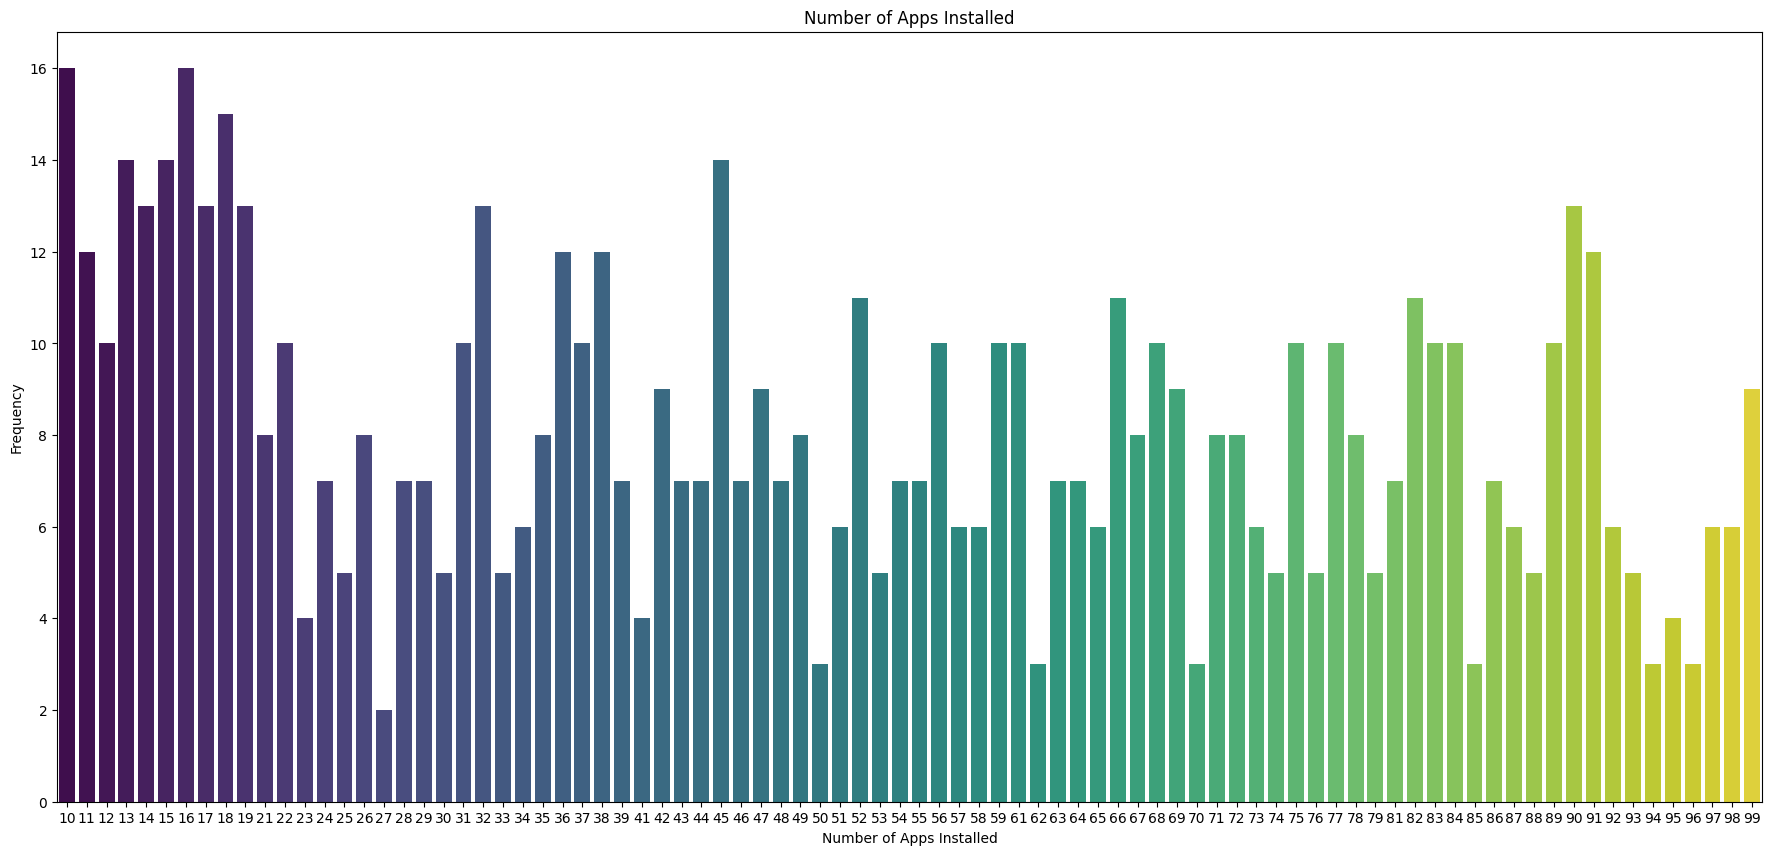

In [6]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Number of Apps Installed', data=df, palette='viridis')
plt.title('Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Frequency')
plt.show()

### Veri Kullanımı Dağılım Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(8, 6))` ile grafik boyutu 8x6 inç olarak ayarlandı.
- **Histogram ve KDE Çizimi**: `sns.histplot()` ile veri kullanımının dağılımı 30 aralık ile histogram ve yoğunluk eğrisi (`kde=True`) şeklinde çizildi. `orchid` rengi kullanıldı.
- **Grafik Başlığı ve Etiketler**: Başlık, x ekseni (`Data Usage (MB/day)`) ve y ekseni (`Frequency`) etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

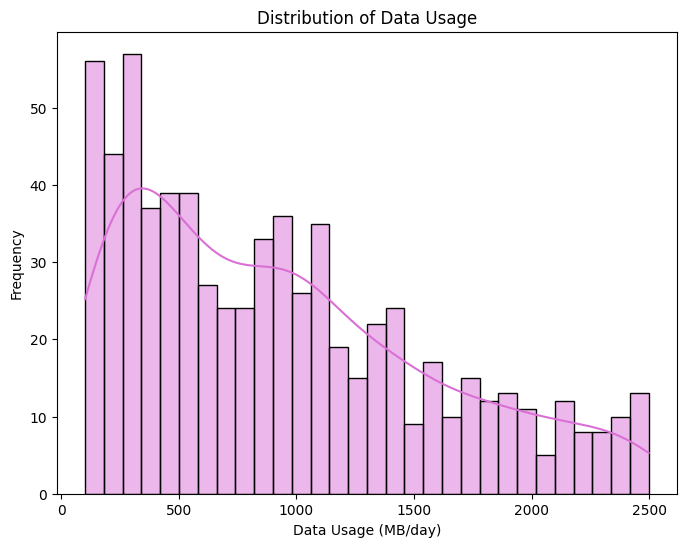

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, kde=True, color='orchid')
plt.title('Distribution of Data Usage')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

### Yaş Dağılımı Kutusu Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(8, 6))` ile grafik boyutu 8x6 inç olarak ayarlandı.
- **Boxplot Çizimi**: `sns.boxplot()` ile yaş verisinin dağılımı görselleştirildi. Renk olarak `orange` seçildi.
- **Grafik Başlığı ve Etiketler**: Başlık ve x ekseni etiketi (`Age`) eklendi. Y ekseni etiketi yalnızca sıklık gösterdiğinden isim verilmedi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

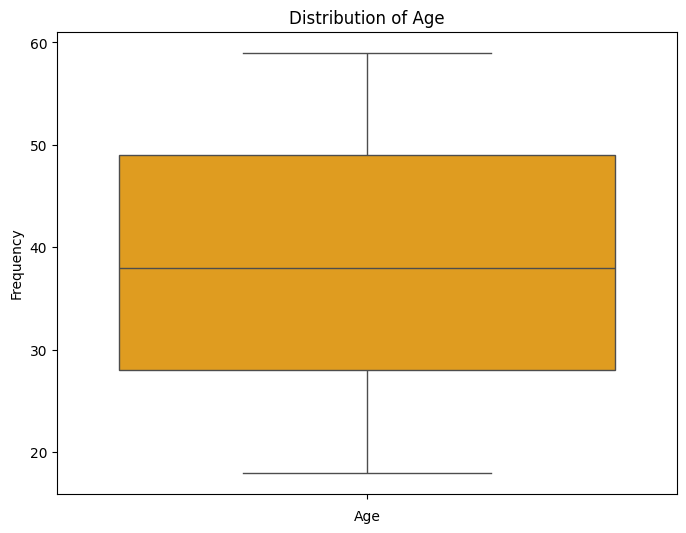

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Age'], color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Cihaz Modeline Göre Kullanıcı Sayısı Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(10, 6))` ile grafik boyutu 10x6 inç olarak ayarlandı.
- **Sayı Grafiği (Countplot)**: `sns.countplot()` ile cihaz modellerine göre kullanıcı sayıları yatay olarak görselleştirildi. `order=df['Device Model'].value_counts().index` ile cihaz modelleri sıklığa göre sıralandı ve `palette='coolwarm'` renk paleti seçildi.
- **Grafik Başlığı ve Etiketler**: Başlık, x ekseni (`Count`) ve y ekseni (`Device Model`) etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

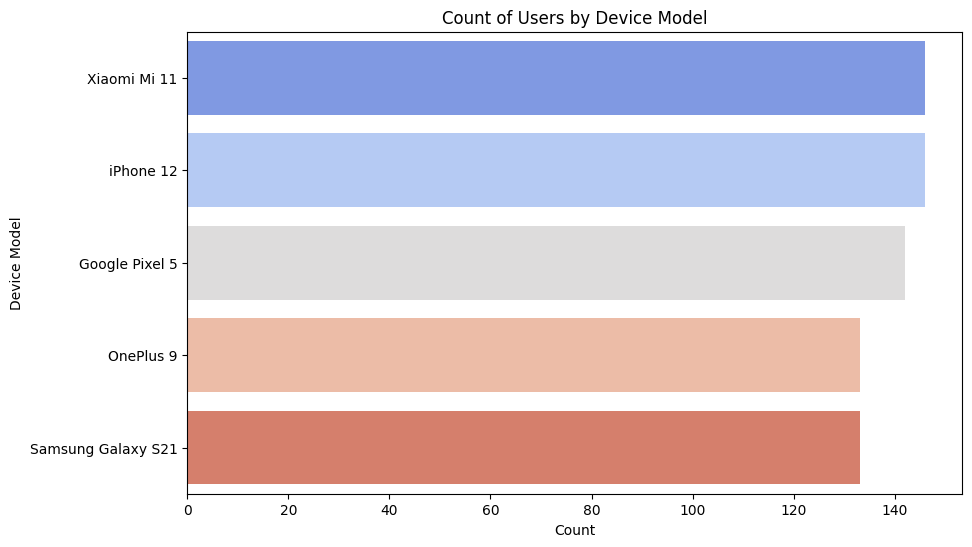

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Device Model', data=df, order=df['Device Model'].value_counts().index, palette='coolwarm')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

### İşletim Sistemi Dağılımı Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(6, 4))` ile grafik boyutu 6x4 inç olarak ayarlandı.
- **Sayı Grafiği (Countplot)**: `sns.countplot()` ile işletim sistemlerinin dağılımı görselleştirildi. `palette='Set2'` ile renk paleti seçildi.
- **Grafik Başlığı ve Etiketler**: Başlık, x ekseni (`Operating System`) ve y ekseni (`Count`) etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

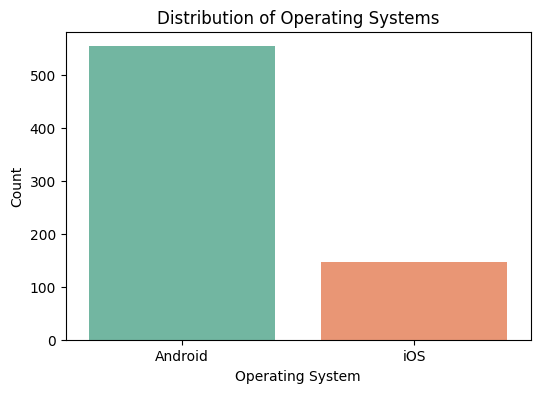

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Operating System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

### Cinsiyet Dağılımı Grafiği
- **Grafik Boyutu**: `plt.figure(figsize=(6, 4))` ile grafik boyutu 6x4 inç olarak ayarlandı.
- **Sayı Grafiği (Countplot)**: `sns.countplot()` ile cinsiyet dağılımı görselleştirildi. `palette='pastel'` ile renk paleti seçildi.
- **Grafik Başlığı ve Etiketler**: Başlık, x ekseni (`Gender`) ve y ekseni (`Count`) etiketleri eklendi.
- **Görselleştirme**: `plt.show()` ile grafiğin ekranda gösterilmesi sağlandı.

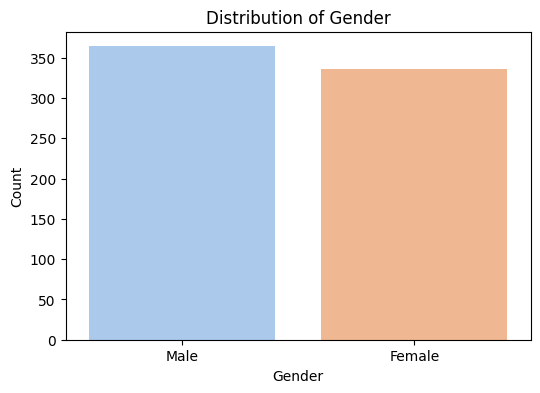

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


---

# Bivariate Analysis